# Module 2 - Approximate inference in graphical models

## Part B - Preparatory exercises
This notebook contains some exercises that you should solve before Module 2. Please see the course page on Canvas for further details on deadlines etc.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

### Computing the posterior distributions in a simple graphical model

In the course we will work with a probabilistic model for ranking players (specifically, tennis players) as an example of a graphical model. In this preparatory exercise we will look at a simplified version of this model, to get acquainted with the basic model formulation.

Assume that you have 2 players playing a game and that we are interested in ranking these 2 players, based on the outcome of a single game between them. To this end, we model the _skill_ of each player, as well as the outcome of the game as random variables. We then want to compute the posterior distribution of the player skills conditionally on the (observed) game outcome.

![model](https://raw.githubusercontent.com/Alenlov/public/main/pgm/directed_graph.png)

More formally, we let $W_1$ be the skill of player 1, $W_2$ be the skill of player 2, and $t$ the outcome of the game. A 
Let $f_1(W_1)$ be the prior of $W_1$ and $f_2(W_2)$ the prior of $W_2$, finally $g(t | W_1, W_2)$ is the distribution of $t$ conditioned on $W_1$ and $W_2$. A grapical model for this problem is shown above. Note that we assume that the player skills are _a priori_ independent and that the game outcome depends on both skills.

For simplicity we assume the following distributions,
$$
f_1(W_1) = \mathcal{N}(W_1 | 0, \sigma^2_0) \\
f_2(W_2) = \mathcal{N}(W_2 | 0, \sigma^2_0) \\
g(t | W_1, W_2) = \mathcal{N}(t | W_1 - W_2, 1).
$$

We would now like to calculate the marginal posterior distributions $p(W_1 | t)$ and $p(W_2 | t)$.

To calculate these distributions we have, using Bayes' theorem,
$$
p(W_i | t) \propto p(t | W_i) f_i(W_i),
$$
where $p(t | W_i)$ can be thought of as the information about $W_i$ that can be deduced from the game output $t$.

To calculate this, again using an application of Bayes' theorem and marginalization we get,
$$
p(t | W_i) = \int p(t, W_j | W_i) \mathrm{d}W_j = \int g(t | W_1, W_2) f_j(W_j) \mathrm{d}W_j,
$$
where $j \neq i$ and $i,j \in \{1,2\}$.

**Question 1:** Derive the expressions for the distributions $p(t | W_1)$ and $p(t | W_2)$.

_Hint: All distributions are Gaussian, so it is enough to identify the mean and variance to know that distribution!_

**Answer** 

First we derive $p(t | W_1)$,

$$
p(t | W_1) = \int g(t | W_1, W_2) f_2(W_2) \mathrm{d}W_2 = \int  \mathcal{N}(t | W_1 - W_2, 1) \mathcal{N}(W_2 | 0, \sigma^2_0)\mathrm{d}W_2.
$$

Since all distributions are gaussian, thus $t = W_1 - W_2 + \epsilon$, where $\epsilon \sim \mathcal{N}(0, 1)$. Instead of doing integral directly, we only need to identify mean $\mathbb{E}(t)$ and variance $\mathbb{Var}(t)$.

$$
\mathbb{E}(t) = W_1 - 0 + 0 = W_1 \\
\mathbb{Var}(t) = \sigma^2_0 + 0 + 1 = \sigma^2_0 + 1
$$

Therefore,
$$
p(t | W_1) = \mathcal{N}(t |W_1, \sigma^2_0 + 1)
$$

Easily,

$$
p(t | W_2) = \mathcal{N}(t |-W_2, \sigma^2_0 + 1)
$$

**Question 2:** Using the previous distributions, derive the expressionf for the marginal posterior distributions $p(W_1 | t)$ and $p(W_2 | t)$.

_Hint: All distributions are Gaussian, so it is enough to identify the mean and variance to know that distribution!_

**Answer**
$$
p(W_1 | t) \propto p(t | W_1) f_1(W_1)\\
$$

$$
p(t | W_1) f_1(W_1) = \mathcal{N}(t |W_1, \sigma^2_0 + 1)\mathcal{N}(W_1 | 0, \sigma^2_0)
$$

Using [Equiation 19](https://mycourses.aalto.fi/pluginfile.php/1426788/mod_resource/content/2/lec2.pdf),

$$
p(W_1 | t) = \mathcal{N}(W_1 | \mu_1, \sigma^2_1),
$$

Where,

$$
\mu_1 = \frac{1}{2+\frac{1}{ \sigma^2_0}} t~~~~~~~~~~\sigma^2_1 = \frac{1}{\frac{1}{ \sigma^2_0 + 1}+\frac{1}{ \sigma^2_0}}.
$$

Same for $p(W_2 | t)$,


$$
p(W_2 | t) = \mathcal{N}(W_2 | \mu_2, \sigma^2_2),
$$

Where,

$$
\mu_2 = -\frac{1}{2+\frac{1}{ \sigma^2_0}} t~~~~~~~~~~\sigma^2_2 = \frac{1}{\frac{1}{ \sigma^2_0 + 1}+\frac{1}{ \sigma^2_0}}.
$$

## Problem 2

### Simulating a mixture distribution

Assume that we have observed data $x_{1:n} = \{x_i\}_{i=1}^n$ with $x_i\in\mathbb{R}^d$. We wish to find *clusters* in this data, i.e. groups of data points that are close to each other. For simplicity we assume that the number of clusters $K$ is known. We model the data using a Gaussian mixture model, i.e.
$$
p(x) = \sum_{k=1}^K \pi_k N(x | \mu_k, \Sigma_k).
$$
That is, a data point belonging to cluster $k$ is assumed to be Gaussian distributed with mean $\mu_k$ and covariance matrix $\Sigma_k$. The mixture weight $\pi_k$ is the (prior) probability of cluster $k$. Note that $\pi_k \geq 0$ and $\sum_{k=1}^K \pi_k = 1$. We write $\pi = (\pi_1, \dots, \pi_K)$ for the vector of weights.

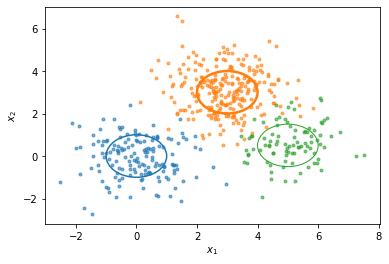

In [3]:
## Simulate and plot example data from a Gaussian mixture model in R^2

# Define model
K = 3
pi = np.array([0.3, 0.5, 0.2], np.float64)
mu = np.array([[0., 0.], [3.,3.], [5., 0.5]], np.float64)
Sigma = np.eye(2) # Use identity covariance for all components for simplicity

# Simulate
n = 500
z = np.random.choice(K, size=n, p=pi)
x = np.zeros([n, 2])
for k in range(K):
    x[z==k, :] = np.random.multivariate_normal(mean=mu[k, :], cov=Sigma, size=np.sum(z==k))
    
# Plot
fig, ax = plt.subplots()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
for k in range(K):
    p = plt.plot(x[z==k,0], x[z==k,1], '.', alpha=0.6)
    circle = plt.Circle(mu[k, :], radius=1, color=p[0].get_color(), lw=pi[k]*5, fill=False)
    ax.add_artist(circle)
plt.show()


For simplicity we will assume that all covariance matrices are eual to the identity, $\Sigma_1 = \dots = \Sigma_K = I$ (this simplifying assumption is relaxed below, as an optional exercise). That means that the unknown parameters of the model are $\theta = \{\pi, \mu_1, \dots, \mu_K\}$.
We will take a Bayesian approach and assign prior distributions to these variables. Specifically, we assume:
$$
p(\pi) = \text{Dirichlet}(\pi | \alpha_1, \dots, \alpha_K), \\
p(\mu_k) = N(\mu_k | m, S), \quad k=1,\dots, K.
$$

**Remark.** The prior distribution for the weight vector $\pi$ is assumed to be a [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution). Similarly to the Beta distribution considered in Part A of these preparatory exercises, this can be thought of as a *distribution over distributions*. The Dirichlet distribution of order $K$ is supported on the $(K-1)$-dimensional probability simplex, which means that a draw form this distribution can be viewed as a probability vector over $K$ categories (or clusters, as considered here).

The task is to compute the posterior distribution $p(\theta \mid x_{1:n})$. From Bayes' rule, we know that the posterior is proportional to the joint distribution of both parameters and data, $p(\theta \mid x_{1:n}) \propto p(\theta, x_{1:n})$. 

**Remark.** A good starting point for Bayesian inference is always to *write out the joint PDF of all variables of the model*.

**Question 1:** Write an expression for the joint PDF $p(\theta, x_{1:n})$, expressed in terms of the basic distributions used above (Normal, Dirichlet, $\dots$).

**Answer** 

$$
p(\theta, x_{1:n}) = p(x_{1:n} | \theta)P(\pi)\prod_{k=1}^KP(\mu_k)\\
= \text{Dirichlet}(\pi |  \alpha_1, \dots, \alpha_K)\prod_{k=1}^KN(\mu_k | m, S)\prod_{i=1}^n\sum_{k=1}^K \pi_k N(x_i | \mu_k, I)
$$

**Remark.** Contrary to the simple coin flip model studied in Part A, there is no closed form expression for the posterior distribution $p(\theta | x_{1:n})$, since this would require us to integrate the expression derived in Problem 1 w.r.t. $\theta$. In other words, the Gaussian *mixture* likelihood is not conjugate to the Dirichlet-plus-Normal prior.

### Introducing latent variables
A very common trick when working with Bayesian modeling is to introduce auxiliary variables. These variables are often (but not always) used to make the generative process underlying the model more explicit. In such cases they are often referred to as latent (i.e., hidden/unobserved) variables. For instance, in the mixture model studied here, it is convenient to introduce an index variable $z_i$ for each data point $x_i$, which is such that $z_i = k$ iff $x_i$ belongs to cluster $k$. *(If you look at the simulation cell above, you will see that these latent variables were used to simulate data from the mixture model.)*
The latent variables can be thought of as missing data, and it is common to refer to the combination of the latent variables and the observed variables, $\{x_{1:n}, z_{1:n}\}$, as the *complete data*.

**Question 2:** Write down the full joint distribution of the paramters, data, and latent variables $p(\theta, x_{1:n}, z_{1:n}).$

*Hint: If $z$ is a categorical random variable with $\text{Prb}(z=k)=\pi_k$, $k=1,\dots,K$, then a compact and convenient way of writing its probability mass function is $p(z) = \pi_z$ (implicitly assuming that $z\in\{1,\dots,K\}$).*

**Answer** 
$$
p(\theta, x_{1:n}, z_{1:n}) = p(x_{1:n}| z_{1:n},\theta) p(z_{1:n}| \theta)P(\pi)\prod_{k=1}^KP(\mu_k)\\
= \text{Dirichlet}(\pi | \alpha_1, \dots, \alpha_K)\prod_{k=1}^KN(\mu_k | m, S)\prod_{i=1}^n \pi_{z_i} N(x_i | \mu_{z_i}, I)
$$

From the expressions that you arrive at in Problems 1 and 2 you should be able to verify that by summing out the latent variables we obtain the original model, i.e.,
$$
\sum_{z_1 \dots, z_n} p(\theta, x_{1:n}, z_{1:n}) = p(\theta, x_{1:n}),
$$
which is of course nothing but a marginalization. Similarly, if we can compute the posterior distribution of the parameters and the latent variables, conditionally on the data, $p(\theta, z_{1:n} | x_{1:n})$, then we can simply marginalize out the latent variables to obtain the original posterior of interest.
This is very useful, since it allows us to design an inference algorithm that approximates the joint posterior $p(\theta, z_{1:n} | x_{1:n})$ and we will then obtain an approximation of the original posterior of interest $p(\theta | x_{1:n})$ as a by-product.

### Deriving full conditionals
As pointed out above, there is no closed form expression for the posterior $p(\theta|x_{1:n})$, nor for the joint posterior $p(\theta, z_{1:n} | x_{1:n})$. Hence, we need to resort to computational algorithms for approximating these distribution. We will not go in to the details of any such algorithms here---that is the topic of the course module! Nevertheless, we will do some additional derivations for our mixture model, and see how these can be used to implement an inference algorithm below.

First, we can ask ourselves the hypothetical question, "what is the posterior distribution of the latent variable $z_i$ if we assume that the model parameters $\theta$ are known?".

**Question 3:** Derive an expression for the conditional distribution $p(z_i \mid \theta, x_i)$. *(Note that $z_i$, the cluster index of data point $x_i$, is conditionally independent of data points $x_j$, $j\neq i$ when conditioning on $\theta$.)*

**Answer**

$$
p(z_i \mid \theta, x_i) = \frac{p(x_i|z_i, \theta)p(z_i|\theta)}{p(x_i|\theta)} = \frac{ \pi_{z_i}N(x_i | \mu_{z_i}, I)}{\sum_{k=1}^K \pi_k N(x_i | \mu_k, I)}
$$

Similarly, we can ask ourselves what the posterior distribution of the model parameters is, if we assume that we know the cluster indices for all data points.

**Question 4:** Derive an expression for the conditional distribution $p(\theta | x_{1:n}, z_{1:n})$.

*Hint: This conditional distribution factorizes over the components of $\theta = \{\pi, \mu_1, \dots, \mu_K\}$ ,
$$
p(\theta | x_{1:n}, z_{1:n})
= p(\pi | x_{1:n}, z_{1:n}) \prod_{k=1}^K p(\mu_k | x_{1:n}, z_{1:n})
$$
so you should compute the expression for each factor in this product.*

Since $\pi \perp x_{1:n} | z_{1:n}$, thus $P(\pi| x_{1:n} , z_{1:n}) = P(\pi| z_{1:n})$.

$$
P(\pi| z_{1:n}) \propto p(z_{1:n}|\pi)p(\pi)\\
= \prod_{i=1}^n \prod_{k=1}^K\pi_{k}^{\mathbb{1}\{z_i=k\}} \text{Dirichlet}(\pi | \alpha_1, \dots, \alpha_K)\\
\propto \prod_{i=1}^n \prod_{k=1}^K\pi_{k}^{\mathbb{1}\{z_i=k\}} \prod_{k=1}^K\pi_{k}^{\alpha_k - 1}\\
=\prod_{k=1}^K\pi_{k}^{\alpha_k - 1 + \sum_{i=1}^n \mathbb{1}\{z_i=k\}}
$$

therefore,

$$
p(\pi | x_{1:n}, z_{1:n}) = \text{Dirichlet}(\pi | \alpha_1 + \sum_{i=1}^n \mathbb{1}\{z_i=1\}, \dots, \alpha_K + \sum_{i=1}^n \mathbb{1}\{z_i=K\})
$$

For each $p(\mu_k | x_{1:n}, z_{1:n})$, $k=1, \dots, k=K$,

$$
p(\mu_k | x_{1:n}, z_{1:n}) \propto p(x_{1:n},z_{1:n}|\mu_k)p(\mu_k)= p(x_{1:n} | \mu_k)p(\mu_k)
$$

notice both likelihood and prior are gaussians,
$$
p(\mu_k | x_{1:n}, z_{1:n}) = N(\mu_k | m_k, S_k)
$$

where,

$$
m_k = S_k(\frac{m}{S} + \frac{\sum_{i=1}^nx_i}{\sigma^2}),~~~~~~~~~S_k=(\frac{1}{S} + \frac{n}{\sigma^2})^{-1}
$$

$\sigma^2$ is the variance of $x_{1:n}$.



**Answer**

### Implementing a Gibbs sampler
We can use the expressions derived in Problems 3 and 4 to implement a so called Gibbs sampler. The Gibbs sampler is a Markov chain Monte Carlo method commonly used for approximate inference in general Bayesian models, and in probabilistic graphical models in particular. We will discuss the theory behind the Gibbs sampler in the course. For now, you can see how it works in practice by filling in the missing lines below!

**Question 5:** Complete the missing lines in the code below and run the Gibbs sampler. (Note that the data used here is geneated in the code cell above.)

TypeError: 'ellipsis' object is not subscriptable

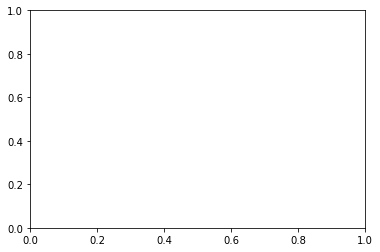

In [3]:
# N.B. These can come in handy!
from numpy.linalg import inv, solve
from scipy.stats import multivariate_normal as mvn

# For "live plotting"
import time
from IPython import display
%matplotlib inline

# Prior
alpha = np.ones(K) # Dirichlet parameters
m = np.zeros(2) # Mean of the cluster means
S = 10*np.eye(2) # Covariance matrix of the prior of the cluster means (note that this is different from the cluster covariance Sigma)

# Initialize
pi = np.array([0.33, 0.33, 0.34], np.float64)
mu = np.array([[0,1],[0,2],[0,3]], np.float64)
z = np.random.choice(K,size=n) # Initialize all data points randomly

# Gibbs loop
fig, ax = plt.subplots()
m_p = np.zeros([K,2])
S_p = np.zeros([K,2,2])
pi_p = np.zeros([K,n])
for iteration in range(50):
    try:
        ### COMPLETE THIS SECTION ###
        # Posterior distribution p(z_i|\theta,x_i)=Categorical(K,pi_p)
        pi_p = ... # This should be a [K,n] array with probabilities for z_i, i=1,...,n on the cols
        #############################
        
        # Simulate latent variables
        for i in range(n): # This can be done faster with np.apply_along_axis
            z[i] = np.random.choice(K,p=pi_p[:,i])
        

        
        ### COMPLETE THIS SECTION ###
        # Posterior distribution p(\pi|x,z)=Dirichlet(\pi|alpha_p)
        alpha_p = ...
        # Posterior distribution p(mu_k|x,z)=N(mu_k|m_pk, S_pk)
        for k in range(K):
            S_p[k,:,:] = ...
            m_p[k,:] = ...
        #############################
        
        # Simulate parameters
        pi = np.random.dirichlet(alpha_p)
        for k in range(K):
            mu[k,:] = np.random.multivariate_normal(mean=m_p[k,:],cov=S_p[k,:,:])
            
        # Plot
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        for k in range(K):
            p = plt.plot(x[z==k,0],x[z==k,1],'.', alpha=0.6)
            circle = plt.Circle(mu[k,:],radius=1,color=p[0].get_color(), lw=pi[k]*5, fill=False)
            ax.add_artist(circle)
                    
        plt.title('Gibbs iteration {}'.format(iteration))
        ax.set_prop_cycle(None)
        display.display(fig)
        display.clear_output(wait=True)
        #time.sleep(1)
    except KeyboardInterrupt:        
        break

**Remark.** The Gibbs sampler is a Markov Chain Monte Carlo method, so its iterates are not expected to converge to a fixed point, but to generate samples from the posterior distribution in the long run.

**Remark.** If you run the code above with different initializations, you might notice that the sampler is quite sensitive to how it is initialized. In the course we will discuss a modification of this method, referred to as a *collapsed Gibbs sampler* which mitigates this issue.
